In [2]:
import keyring
key = keyring.get_password('fred-key', 'birdblues')

In [3]:
from fredapi import Fred
import pandas as pd
import matplotlib.pyplot as plt

import warnings

warnings.filterwarnings("ignore")
# pd.options.display.float_format = '{:.4%}'.format

fred = Fred(api_key=key)

# 수집할 티커 리스트
tickers = ['WRBWFRBL', 'WDTGAL', 'WLRRAOL', 'WSHOSHO', 'WLCFLPCL']
labels = [
    'Reserve Balances with Federal Reserve Banks',
    'U.S. Treasury, General Account',
    'Reverse Repurchase Agreements: Others',
    'Securities Held Outright',
    'Primary Credit'
]

# 빈 데이터프레임 생성
data = pd.DataFrame()

# 티커 리스트에서 데이터 수집
for ticker, label in zip(tickers, labels):
    series = fred.get_series(ticker)  # FRED에서 시계열 데이터 가져오기
    data[ticker] = series

# data.fillna(method='ffill', inplace=True)
# data = data.pct_change().dropna()
# returns = (1 + data).cumprod() - 1
# 데이터프레임 출력

data['WSHOSHO+WLCFLPCL'] = data['WSHOSHO'] + data['WLCFLPCL']
data['WRBWFRBL+WDTGAL+WLRRAOL'] = data['WRBWFRBL'] + data['WDTGAL'] + data['WLRRAOL']
data['WSHOSHO+WLCFLPCL-WLRRAOL-WRBWFRBL'] = data['WSHOSHO'] + data['WLCFLPCL'] - data['WRBWFRBL'] - data['WLRRAOL']
data = data.resample('D').ffill()

data = data[-252*3:]
display(data)



,WRBWFRBL,WDTGAL,WLRRAOL,WSHOSHO,WLCFLPCL,WSHOSHO+WLCFLPCL,WRBWFRBL+WDTGAL+WLRRAOL,WSHOSHO+WLCFLPCL-WLRRAOL-WRBWFRBL
2022-07-07,3222930.0,687943.0,2168026.0,8456027.0,1765.0,8457792.0,6078899.0,3066836.0
2022-07-08,3222930.0,687943.0,2168026.0,8456027.0,1765.0,8457792.0,6078899.0,3066836.0
2022-07-09,3222930.0,687943.0,2168026.0,8456027.0,1765.0,8457792.0,6078899.0,3066836.0
2022-07-10,3222930.0,687943.0,2168026.0,8456027.0,1765.0,8457792.0,6078899.0,3066836.0
2022-07-11,3222930.0,687943.0,2168026.0,8456027.0,1765.0,8457792.0,6078899.0,3066836.0
...,...,...,...,...,...,...,...,...
2024-07-27,3275885.0,767419.0,399121.0,6758287.0,6751.0,6765038.0,4442425.0,3090032.0
2024-07-28,3275885.0,767419.0,399121.0,6758287.0,6751.0,6765038.0,4442425.0,3090032.0
2024-07-29,3275885.0,767419.0,399121.0,6758287.0,6751.0,6765038.0,4442425.0,3090032.0
2024-07-30,3275885.0,767419.0,399121.0,6758287.0,6751.0,6765038.0,4442425.0,3090032.0


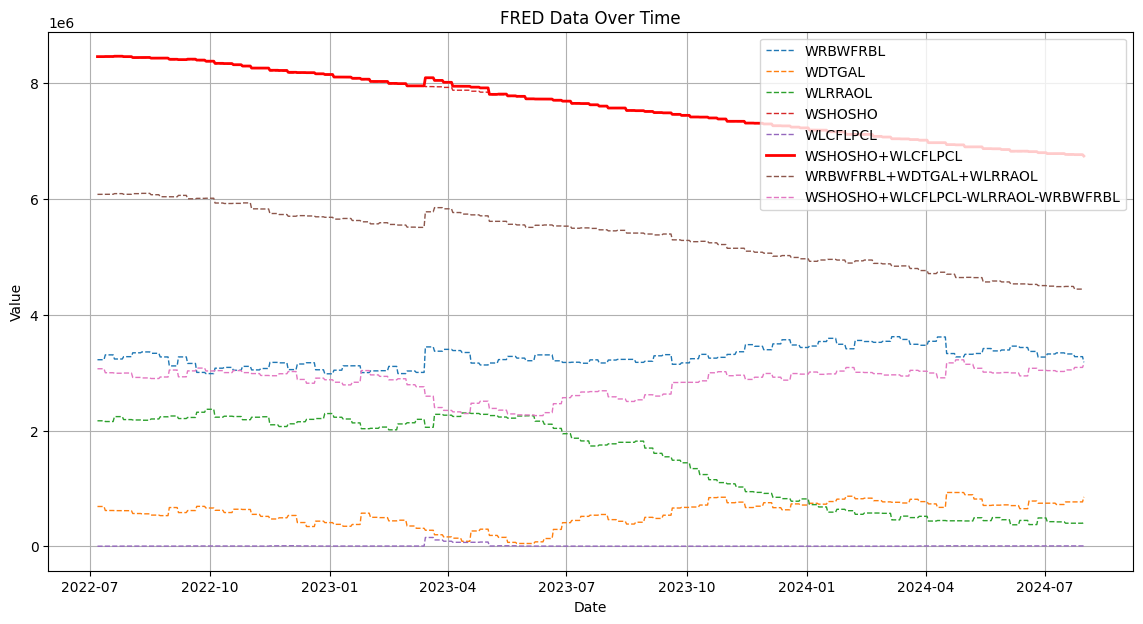

In [4]:
# 데이터 시각화

plt.figure(figsize=(14, 7))
for column in data.columns:
    if column == 'WSHOSHO+WLCFLPCL':
        plt.plot(data.index, data[column], label=column, color='red', linewidth=2)
    elif column == 'WSHOSHO+WLCFLPCL-WLRRAOL-WRBWFRB':
        plt.plot(data.index, data[column], label=column, color='blue', linewidth=2)
    else:
        plt.plot(data.index, data[column], label=column, linestyle='dashed', linewidth=1)

plt.title('FRED Data Over Time')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()

| 티커    | 이름 | 설명 | 용도 | 특징 |
|---------|------|------|------|------|
| **WRBWFRBL** | Liabilities and Capital: Other Factors Draining Reserve Balances: Reserve Balances with Federal Reserve Banks: Wednesday Level | 연방준비은행에 예치된 준비금의 수요일 기준 잔고 | 은행 시스템의 유동성 파악 및 통화 정책 분석 | 지급준비금 은행이 고객의 예금 인출을 대비해 예치 |
| **WDTGAL** | Liabilities and Capital: Liabilities: Deposits with F.R. Banks, Other Than Reserve Balances: U.S. Treasury, General Account: Wednesday Level | 연방준비은행에 예치된 예금 중 준비금을 제외한 미국 재무부의 일반 계좌 잔고 | 재무부 현금 관리 및 유동성 조절 분석 | 재무부 TGA 잔고<br>재정적자 > 채권 발행 > 지준금감소 > TGA 잔고 증가 <br>재무부가 재정지출 > TGA잔고감소 > 지준금 증가 |
| **WLRRAOL** | Liabilities and Capital: Liabilities: Reverse Repurchase Agreements: Others: Wednesday Level | 연준의 역레포 거래에서 발생한 기타 부채 | 유동성 관리 및 통화 정책 분석 | MMF 사모펀드 등 여유 자금 |
| **WSHOSHO** | Assets: Securities Held Outright: Securities Held Outright: Wednesday Level | 연방준비은행이 직접 보유한 유가증권의 총량 | 자산 구성 및 통화 정책 방향성 분석 | QE시 잔고 증가 QT시 잔고 감소  |
| **WLCFLPCL** | Assets: Liquidity and Credit Facilities: Loans: Primary Credit: Wednesday Level | 연방준비은행이 예금 기관에 제공하는 주요 신용 대출의 잔고 | 유동성 공급 및 신용 시장 상황 분석 | 연준의 대출 창구 |


In [14]:

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

m2 = fred.get_series('M2SL') * 1000
WLRRAOL = fred.get_series('WLRRAOL')
WTREGEN = fred.get_series('WTREGEN') * 1000
WDTGAL = fred.get_series('WDTGAL')
sp500 = fred.get_series('SP500')

data2 = pd.DataFrame()
data2['WLRRAOL'] = WLRRAOL.resample('D').ffill()
data2['M2SL'] = m2.resample('D').ffill()
data2['WTREGEN'] = WTREGEN.resample('D').ffill()
data2['WDTGAL'] = WDTGAL.resample('D').ffill()

data2.fillna(method='ffill', inplace=True)
# data2 = data2.pct_change().dropna()

data2['M2SL-WLRRAOL-WDTGAL-WTREGEN'] = data2['M2SL'] - data2['WLRRAOL'] - data2['WDTGAL']
data2['sp500'] = sp500.resample('D').ffill()

data2['test1'] = scaler.fit_transform(data2[['M2SL-WLRRAOL-WDTGAL-WTREGEN']])
data2['test2'] = scaler.fit_transform(data2[['sp500']])
data2.dropna(inplace=True)

# data2 = data2[-252*7:]
display(data2)

,WLRRAOL,M2SL,WTREGEN,WDTGAL,M2SL-WLRRAOL-WDTGAL-WTREGEN,sp500,test1,test2
2014-08-04,115757.0,11451900.0,62335.0,70123.0,11266020.0,1938.99,0.387800,0.028636
2014-08-05,115757.0,11451900.0,62335.0,70123.0,11266020.0,1920.21,0.387800,0.023743
2014-08-06,123782.0,11451900.0,71513.0,69324.0,11258794.0,1920.24,0.387291,0.023751
2014-08-07,123782.0,11451900.0,71513.0,69324.0,11258794.0,1909.57,0.387291,0.020971
2014-08-08,123782.0,11451900.0,71513.0,69324.0,11258794.0,1931.59,0.387291,0.026708
...,...,...,...,...,...,...,...,...
2024-07-27,399121.0,21024700.0,774315.0,767419.0,19858160.0,5459.10,0.993557,0.945781
2024-07-28,399121.0,21024700.0,774315.0,767419.0,19858160.0,5459.10,0.993557,0.945781
2024-07-29,399121.0,21024700.0,774315.0,767419.0,19858160.0,5463.54,0.993557,0.946938
2024-07-30,399121.0,21024700.0,774315.0,767419.0,19858160.0,5436.44,0.993557,0.939877


,WLRRAOL,M2SL,WTREGEN,WDTGAL,M2SL-WLRRAOL-WDTGAL-WTREGEN,sp500,test1,test2
2024-06-10,371841.0,21024700.0,710309.0,703314.0,19949545.0,5360.79,1.000000,0.920167
2024-06-11,371841.0,21024700.0,710309.0,703314.0,19949545.0,5375.32,1.000000,0.923952
2024-06-12,447574.0,21024700.0,673573.0,650212.0,19926914.0,5421.03,0.998404,0.935862
2024-06-13,447574.0,21024700.0,673573.0,650212.0,19926914.0,5433.74,0.998404,0.939173
2024-06-14,447574.0,21024700.0,673573.0,650212.0,19926914.0,5431.60,0.998404,0.938616
2024-06-15,447574.0,21024700.0,673573.0,650212.0,19926914.0,5431.60,0.998404,0.938616
2024-06-16,447574.0,21024700.0,673573.0,650212.0,19926914.0,5431.60,0.998404,0.938616
2024-06-17,447574.0,21024700.0,673573.0,650212.0,19926914.0,5473.23,0.998404,0.949462
2024-06-18,447574.0,21024700.0,673573.0,650212.0,19926914.0,5487.03,0.998404,0.953058
2024-06-20,375542.0,21024700.0,723410.0,782158.0,19867000.0,5473.17,0.994180,0.949447


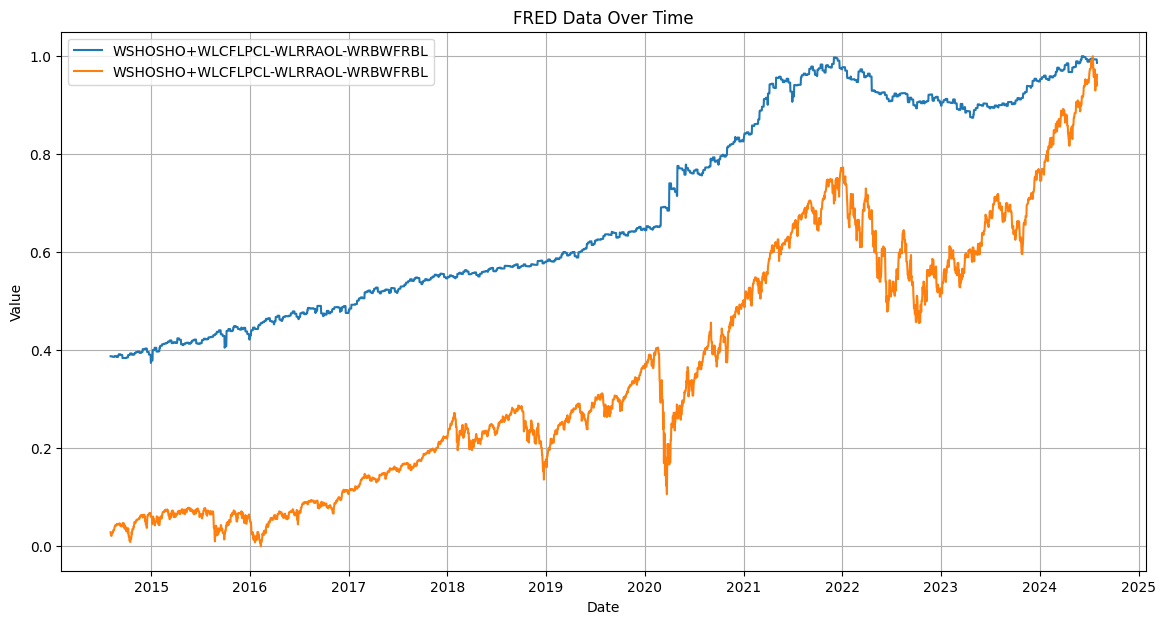

In [15]:
# data2 = (1 + data2).cumprod()

display(data2.tail(50))

plt.figure(figsize=(14, 7))
# for column in data2.columns:
#     plt.plot(data2.index, data2[column], label=column)

plt.plot(data2.index, data2['test1'], label=column)
plt.plot(data2.index, data2['test2'], label=column)
plt.title('FRED Data Over Time')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()